In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Data Collection
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results_20240103.csv')
pd.set_option('display.max.columns', None)
#pd.set_option('display.max.rows', None)

In [3]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50142874,NaN,Brooklyn,3086,BRIGHTON 2 STREET,11235.0,3476929318,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/03/2024,NaN,40.576549,-73.965057,313.0,48.0,36001.0,3245041.0,3.086830e+09,BK19,NaN
1,50122466,DALI NYC,Manhattan,37,MARKET STREET,10002.0,9175745317,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/03/2024,NaN,40.712470,-73.994395,103.0,1.0,800.0,1079615.0,1.002770e+09,MN27,NaN
2,50144691,NaN,Brooklyn,2924,FULTON STREET,11207.0,9294544933,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/03/2024,NaN,40.679230,-73.886839,305.0,37.0,117000.0,3087922.0,3.039520e+09,BK82,NaN
3,50131561,NaN,Queens,13335,ROOSEVELT AVE,11354.0,6464043193,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/03/2024,NaN,40.758502,-73.833242,407.0,20.0,87100.0,4112276.0,4.049730e+09,QN22,NaN
4,50143505,SQUARESPACE,Manhattan,225,VARICK STREET,10014.0,9147870703,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/03/2024,NaN,40.729139,-74.005246,102.0,3.0,6700.0,1009758.0,1.005810e+09,MN23,NaN


In [4]:
#Checking data size
df.shape

(211688, 27)

In [5]:
#Checking columns and data types
df.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point1          float64
dtype: object

In [6]:
#Checking the percentege of missing values in each variable
#The isna() function will show us the percentage of non-existent values for each variable.
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

Location Point1          100.000000
GRADE DATE                55.309701
GRADE                     51.164922
SCORE                      4.807547
BIN                        1.997279
VIOLATION CODE             1.695420
VIOLATION DESCRIPTION      1.695420
Council District           1.519217
Community Board            1.519217
NTA                        1.519217
Census Tract               1.519217
ZIPCODE                    1.269793
CUISINE DESCRIPTION        1.162088
ACTION                     1.162088
INSPECTION TYPE            1.162088
DBA                        0.317921
BBL                        0.250841
BUILDING                   0.139828
Latitude                   0.132270
Longitude                  0.132270
STREET                     0.001417
PHONE                      0.000945
BORO                       0.000000
RECORD DATE                0.000000
CRITICAL FLAG              0.000000
INSPECTION DATE            0.000000
CAMIS                      0.000000
dtype: float64

In [7]:
#dropping rows with NaN values
df.dropna(subset=['GRADE DATE','SCORE','BIN','VIOLATION CODE','VIOLATION DESCRIPTION','Council District','Community Board','NTA','Census Tract','ZIPCODE','CUISINE DESCRIPTION','ACTION','INSPECTION TYPE'], inplace=True)

In [8]:
df.dropna(subset=['DBA','BBL','BUILDING','Latitude','Longitude','STREET','PHONE','NTA'], inplace=True)

In [9]:
#dropping columns that are not significant 
df.drop(['Location Point1'],axis='columns', inplace=True)

In [10]:
df.drop_duplicates()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
57,50118100,ROYAL RIB,Brooklyn,256,MALCOLM X BOULEVARD,11233.0,7184539284,American,05/14/2022,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,5.0,A,05/14/2022,01/03/2024,Pre-permit (Operational) / Initial Inspection,40.684375,-73.929362,303.0,36.0,29500.0,3046166.0,3.016610e+09,BK35
64,50044475,THEATER (FLY),Manhattan,4,PENN PLZ,10121.0,2124656273,American,04/29/2023,Violations were cited in the following area(s).,04L,Evidence of mice or live mice in establishment...,Critical,13.0,A,04/29/2023,01/03/2024,Cycle Inspection / Initial Inspection,40.750655,-73.991944,105.0,3.0,10100.0,1082908.0,1.007810e+09,MN17
80,50047780,DUTCH FREDS,Manhattan,307,WEST 47 STREET,10036.0,6469186923,American,10/05/2022,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,12.0,A,10/05/2022,01/03/2024,Cycle Inspection / Initial Inspection,40.760637,-73.988016,104.0,3.0,12700.0,1025099.0,1.010380e+09,MN15
83,41066771,DUNKIN,Brooklyn,5702,2 AVENUE,11220.0,7184395119,Donuts,06/06/2023,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,13.0,A,06/06/2023,01/03/2024,Cycle Inspection / Initial Inspection,40.645078,-74.021109,307.0,38.0,2200.0,3330243.0,3.008440e+09,BK32
85,50033695,HANEUL BABSANG,Queens,15129,34TH AVE,11354.0,7184450243,Korean,12/08/2023,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,12.0,A,12/08/2023,01/03/2024,Cycle Inspection / Re-inspection,40.767270,-73.812772,407.0,20.0,115500.0,4118306.0,4.052360e+09,QN51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211679,40641437,MARUZZELLA,Manhattan,1483,FIRST AVENUE,10075.0,2129888877,Italian,02/19/2020,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,02/19/2020,01/03/2024,Cycle Inspection / Initial Inspection,40.771242,-73.953495,108.0,5.0,13400.0,1045210.0,1.014520e+09,MN31
211680,40372112,GREEN HOUSE CAFE,Brooklyn,7717,THIRD AVENUE,11209.0,7188338200,American,08/03/2021,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,08/03/2021,01/03/2024,Cycle Inspection / Initial Inspection,40.629821,-74.028450,310.0,43.0,6400.0,3149778.0,3.059600e+09,BK31
211682,41288582,XOCHIMILCO FAMILY REST,Bronx,653,MELROSE AVENUE,10455.0,7184025400,Mexican,06/12/2023,Violations were cited in the following area(s).,09C,"Design, construction, materials used or mainte...",Not Critical,12.0,A,06/12/2023,01/03/2024,Cycle Inspection / Initial Inspection,40.818549,-73.916654,201.0,17.0,6700.0,2001675.0,2.023990e+09,BX34
211683,50111580,MAMA GANOUSH,Manhattan,638,LEXINGTON AVENUE,10022.0,9173883816,Mediterranean,04/06/2023,Violations were cited in the following area(s).,06F,"Wiping cloths not stored clean and dry, or in ...",Critical,21.0,B,04/06/2023,01/03/2024,Cycle Inspection / Re-inspection,40.759138,-73.970440,105.0,4.0,10000.0,1071461.0,1.013098e+09,MN19


In [11]:
print('Clean dataset: ')
print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1])

Clean dataset: 
Observations:  91974
Variables:  26


In [12]:
#The dataset contains 211688, 27 restaurants inspected, with a total of 27 variables each.
#After dropping rows that has NaN Values, the dataset has 91974 rows and 26 variables.

In [13]:
''''DATA DICTIONARY

Column Name	              Column Description
	
CAMIS	                  Unique identifier for the establishment (restaurant)
DBA                       Establishment (restaurant) name
BORO	                  Borough of establishment (restaurant) location
BUILDING	              Building number for establishment (restaurant) location
STREET	                  Street name for establishment (restaurant) location
ZIPCODE	                  Zip code of establishment (restaurant) location
PHONE	                  Phone number
CUISINE DESCRIPTION	      Establishment (restaurant) cuisine
INSPECTION DATE	
ACTION                    Action associated with each establishment (restaurant) inspection
VIOLATION CODE	          Violation code associated with an establishment (restaurant) inspection
VIOLATION DESCRIPTION	  Violation description associated with an establishment  (restaurant)                                    inspection
CRITICAL FLAG	          Indicator of critical violation
SCORE	                  Total score for a particular inspection
GRADE	                  Grade associated with the inspection
GRADE DATE	              Date when grade was issued to the establishment (restaurant)
RECORD DATE	              Date record was added to dataset
INSPECTION TYPE	          A combination of the inspection program and the type of inspection performed'''


"'DATA DICTIONARY\n\nColumn Name\t              Column Description\n\t\nCAMIS\t                  Unique identifier for the establishment (restaurant)\nDBA                       Establishment (restaurant) name\nBORO\t                  Borough of establishment (restaurant) location\nBUILDING\t              Building number for establishment (restaurant) location\nSTREET\t                  Street name for establishment (restaurant) location\nZIPCODE\t                  Zip code of establishment (restaurant) location\nPHONE\t                  Phone number\nCUISINE DESCRIPTION\t      Establishment (restaurant) cuisine\nINSPECTION DATE\t\nACTION                    Action associated with each establishment (restaurant) inspection\nVIOLATION CODE\t          Violation code associated with an establishment (restaurant) inspection\nVIOLATION DESCRIPTION\t  Violation description associated with an establishment  (restaurant)                                    inspection\nCRITICAL FLAG\t          Ind

In [14]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
57,50118100,ROYAL RIB,Brooklyn,256,MALCOLM X BOULEVARD,11233.0,7184539284,American,05/14/2022,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,5.0,A,05/14/2022,01/03/2024,Pre-permit (Operational) / Initial Inspection,40.684375,-73.929362,303.0,36.0,29500.0,3046166.0,3.016610e+09,BK35
64,50044475,THEATER (FLY),Manhattan,4,PENN PLZ,10121.0,2124656273,American,04/29/2023,Violations were cited in the following area(s).,04L,Evidence of mice or live mice in establishment...,Critical,13.0,A,04/29/2023,01/03/2024,Cycle Inspection / Initial Inspection,40.750655,-73.991944,105.0,3.0,10100.0,1082908.0,1.007810e+09,MN17
80,50047780,DUTCH FREDS,Manhattan,307,WEST 47 STREET,10036.0,6469186923,American,10/05/2022,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,12.0,A,10/05/2022,01/03/2024,Cycle Inspection / Initial Inspection,40.760637,-73.988016,104.0,3.0,12700.0,1025099.0,1.010380e+09,MN15
83,41066771,DUNKIN,Brooklyn,5702,2 AVENUE,11220.0,7184395119,Donuts,06/06/2023,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,13.0,A,06/06/2023,01/03/2024,Cycle Inspection / Initial Inspection,40.645078,-74.021109,307.0,38.0,2200.0,3330243.0,3.008440e+09,BK32
85,50033695,HANEUL BABSANG,Queens,15129,34TH AVE,11354.0,7184450243,Korean,12/08/2023,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,12.0,A,12/08/2023,01/03/2024,Cycle Inspection / Re-inspection,40.767270,-73.812772,407.0,20.0,115500.0,4118306.0,4.052360e+09,QN51


<Axes: title={'center': 'Frequency of Inspection by Year'}, xlabel='year'>

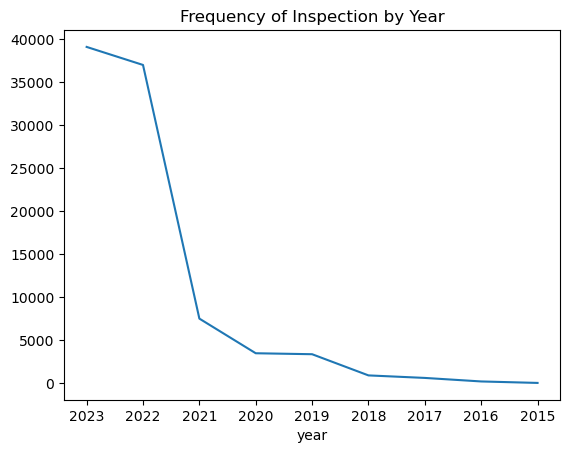

In [15]:
#Frequency of Inspection by Year
df['year'] = df['INSPECTION DATE'].str.findall(r'(\d{4})').apply(lambda x: x[0])
df['year'].value_counts().plot(kind="line", title = "Frequency of Inspection by Year")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island')])

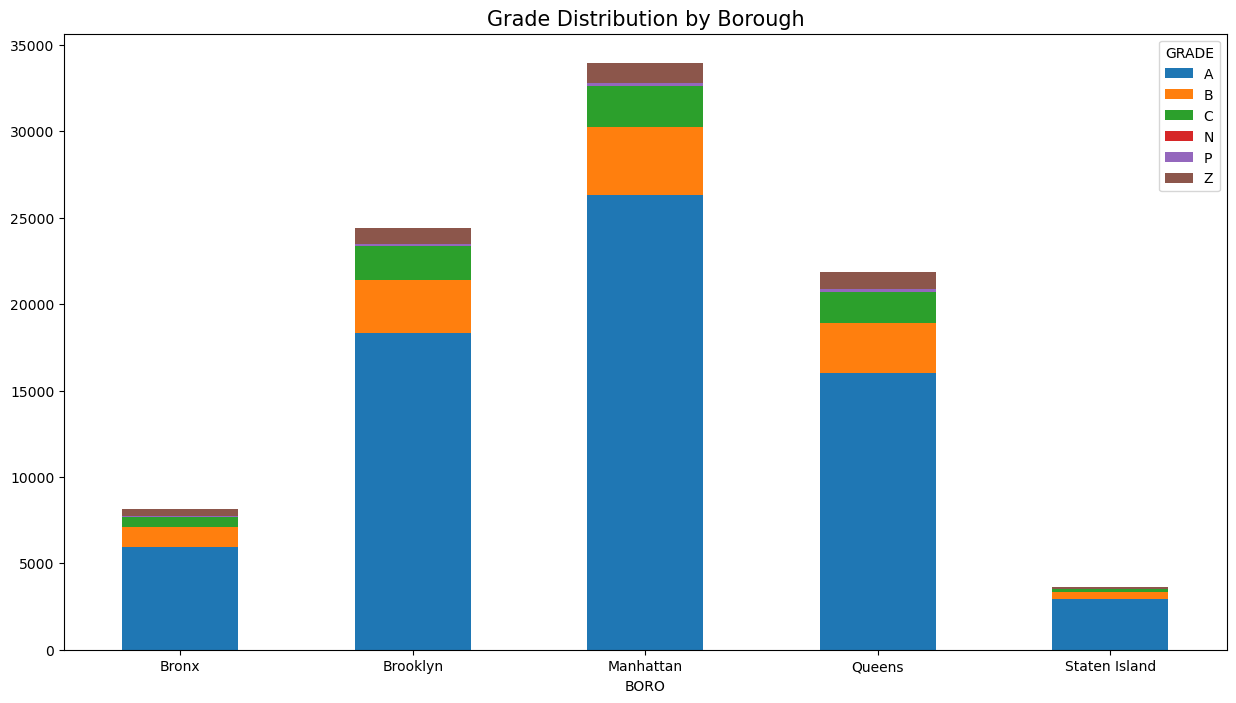

In [48]:
#Analysis for Grade distribution by Borough

# Vizualization of Distribution of grade by borough
pd.crosstab(df.BORO, df.GRADE).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Grade Distribution by Borough', fontsize = 15)
plt.xticks(rotation=0)


In [18]:
#Checking Top 5 of Cuisine Description
df['CUISINE DESCRIPTION'].value_counts()

CUISINE DESCRIPTION
American                    16605
Chinese                      8255
Coffee/Tea                   7026
Pizza                        5685
Bakery Products/Desserts     3638
                            ...  
Iranian                         7
Haute Cuisine                   5
Basque                          4
Chilean                         3
Chimichurri                     2
Name: count, Length: 89, dtype: int64

In [49]:
#Checking Top 5 of Cuisine Description in percentage
df['CUISINE DESCRIPTION'].value_counts()
df['CUISINE DESCRIPTION'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

CUISINE DESCRIPTION
American                    18.1%
Chinese                      9.0%
Coffee/Tea                   7.6%
Pizza                        6.2%
Bakery Products/Desserts     4.0%
                            ...  
Iranian                      0.0%
Haute Cuisine                0.0%
Basque                       0.0%
Chilean                      0.0%
Chimichurri                  0.0%
Name: proportion, Length: 89, dtype: object

In [20]:
#Checking Cuisine counts
df['CUISINE DESCRIPTION'].describe()

count        91974
unique          89
top       American
freq         16605
Name: CUISINE DESCRIPTION, dtype: object

Text(0.5, 1.0, 'Grade by Cuisine')

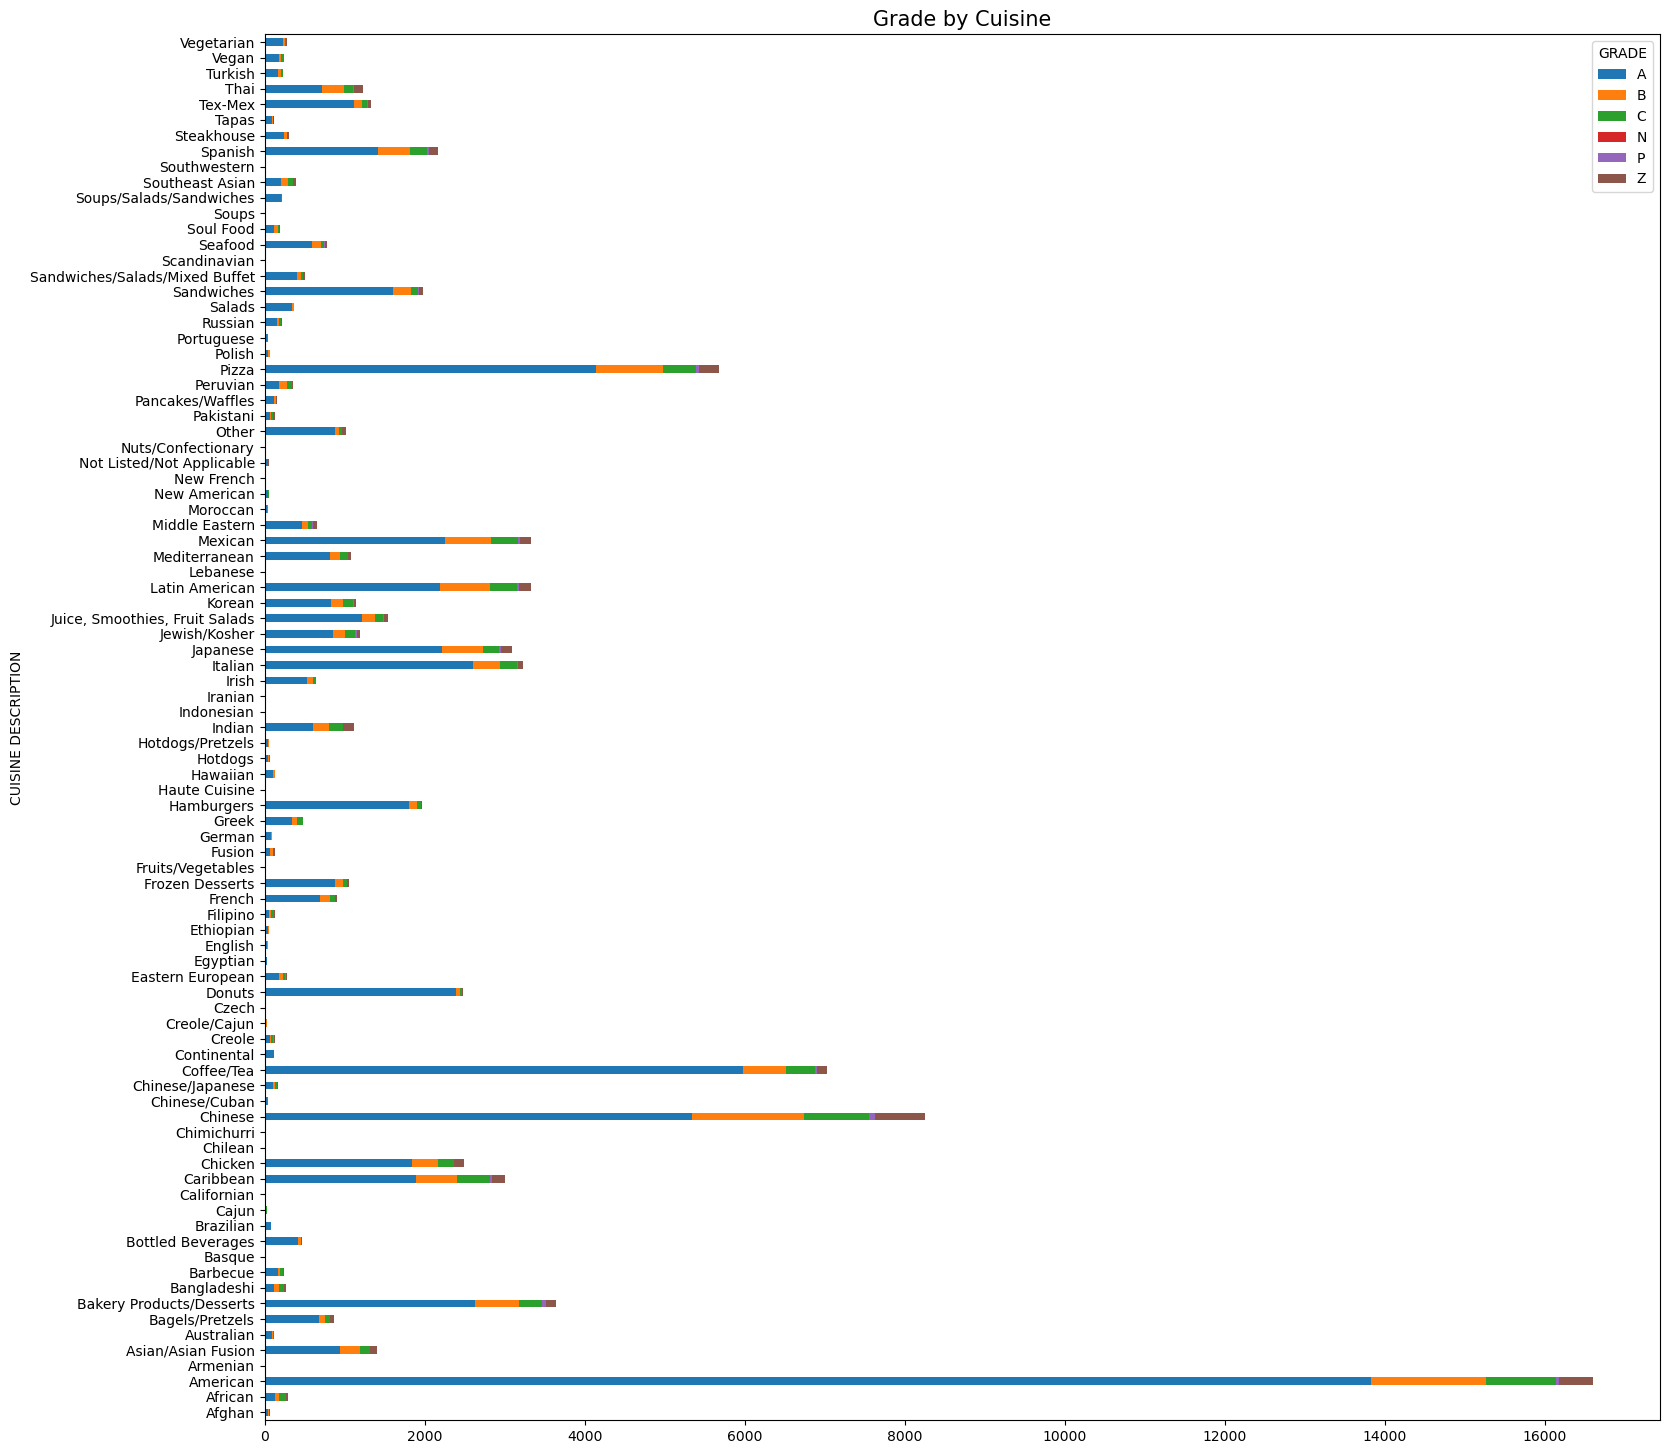

In [22]:
#Analysis for Grade Distribution by Cuisine

#Visualization for Grade Distribution by Cuisine
pd.crosstab(df['CUISINE DESCRIPTION'], df['GRADE']).plot(kind="barh", figsize=(18,18), stacked=True)
plt.title('Grade by Cuisine', fontsize = 15)

In [79]:
#Analysis for Top_5_Cuisine
Top_5_Cuisine=df.groupby(['GRADE'])['CUISINE DESCRIPTION'].value_counts().iloc[:5]
Top_5_Cuisine
#Top 5 Cuisines with Grade A in percentage.
Perc_Top_5_Cuisine=df.groupby(['GRADE'])['CUISINE DESCRIPTION'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
Perc_Top_5_Cuisine


GRADE  CUISINE DESCRIPTION      
A      American                     19.9%
       Coffee/Tea                    8.6%
       Chinese                       7.7%
       Pizza                         6.0%
       Bakery Products/Desserts      3.8%
                                    ...  
Z      Armenian                      0.1%
       Moroccan                      0.1%
       Not Listed/Not Applicable     0.1%
       Ethiopian                     0.0%
       Egyptian                      0.0%
Name: proportion, Length: 346, dtype: object

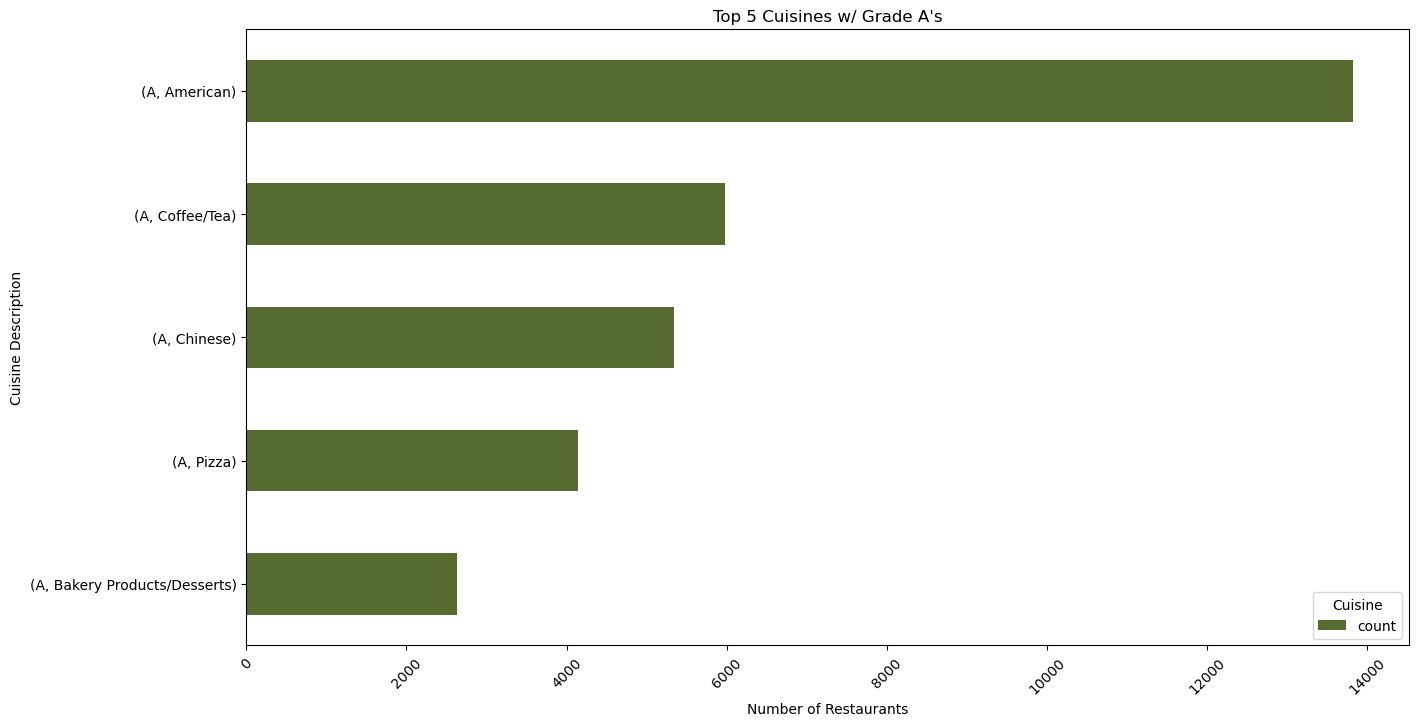

In [82]:

# Visualization of Top 5 Cuisines with Grade A's
Top_5_Cuisine=df.groupby(['GRADE'])['CUISINE DESCRIPTION'].value_counts().iloc[:5].sort_values(ascending=True)
Top_5_Cuisine.plot(kind="barh", figsize=(15,8), stacked=True, color=['darkolivegreen'])
plt.xticks(rotation=45)
plt.title("Top 5 Cuisines w/ Grade A's")
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Description')
plt.legend(title='Cuisine', loc='lower right')
plt.show()


In [93]:
#Analysis for Top 5 Most Common Health Violation
Top_5_CV=df.groupby(['GRADE'])['VIOLATION CODE'].value_counts().iloc[:5].sort_values(ascending=False)
Top_5_CV

GRADE  VIOLATION CODE
A      10F               16541
       06D                6080
       08A                6017
       10B                5113
       06C                4295
Name: count, dtype: int64

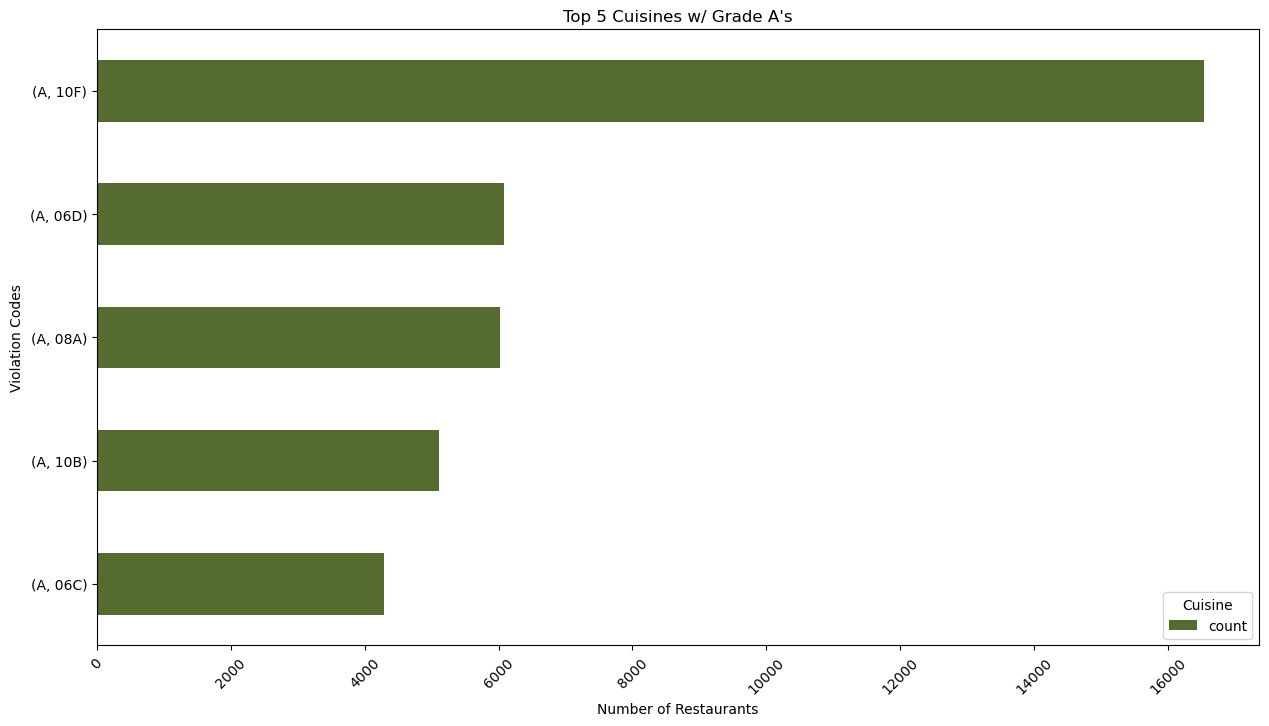

In [102]:
#Visualization of Top 5 Cuisines w/ Grade A and it's Violation Code

Top_5_CV=df.groupby(['GRADE'])['VIOLATION CODE'].value_counts().iloc[:5].sort_values(ascending=True)
Top_5_CV.plot(kind="barh", figsize=(15,8), stacked=True, color=['darkolivegreen'])
plt.xticks(rotation=45)
plt.title("Top 5 Cuisines w/ Grade A's")
plt.xlabel('Number of Restaurants')
plt.ylabel('Violation Codes')
plt.legend(title='Cuisine', loc='lower right')
plt.show()


In [104]:
#Analysis for Critical Flag
df.groupby(['GRADE','DBA','CUISINE DESCRIPTION'])['CRITICAL FLAG'].count().sort_values(ascending=False)


GRADE  DBA                                  CUISINE DESCRIPTION
A      DUNKIN                               Donuts                 1486
       STARBUCKS                            Coffee/Tea              861
       SUBWAY                               Sandwiches              733
       MCDONALD'S                           Hamburgers              677
       POPEYES                              Chicken                 357
                                                                   ... 
       RED HOOK COFFEE SHOP                 Coffee/Tea                1
       UNO CAFE & BILLIARDS                 American                  1
       FOOTPRINTS CAFE UTICA CLOUD KITCHEN  Caribbean                 1
       FOR ALL THINGS GOOD                  Mexican                   1
       MAYHEM BOOTH 8                       Other                     1
Name: CRITICAL FLAG, Length: 21594, dtype: int64

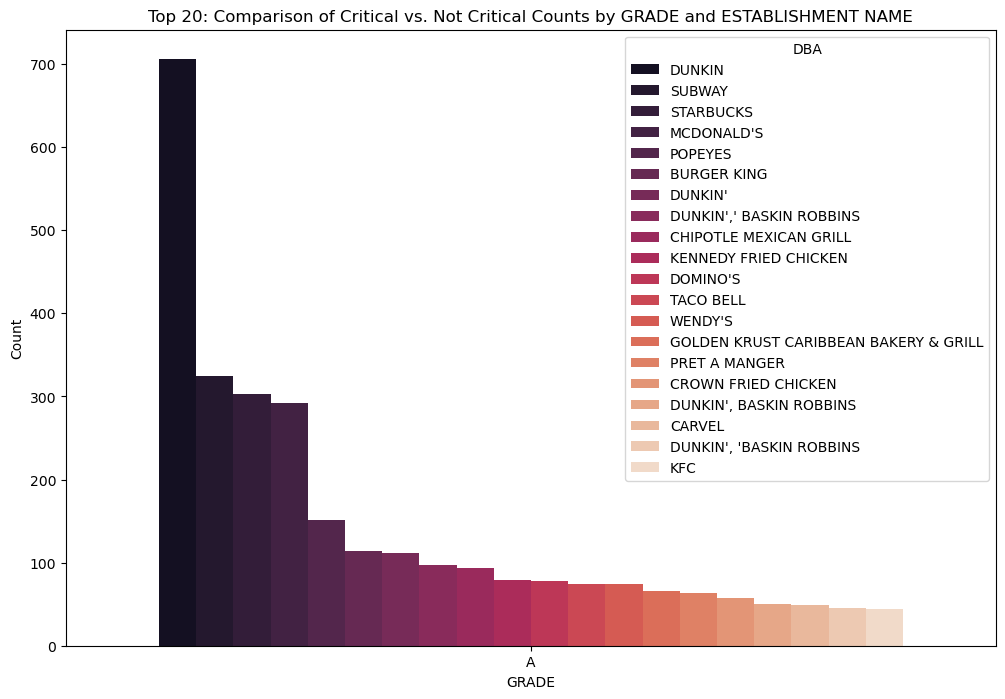

In [106]:
#Visualization for top 20 Restauarants with Grade A and critical flags by DBA
grouped_data = df.groupby(['GRADE', 'DBA'])['CRITICAL FLAG'].value_counts().unstack(fill_value=0)

plot_data = grouped_data.reset_index()
# Select the top 20 combinations based on the total count
top_20_combinations = plot_data.sort_values('Critical', ascending=False).head(20)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_combinations, x='GRADE', y='Critical', hue='DBA', palette='rocket')
plt.title('Top 20: Comparison of Critical vs. Not Critical Counts by GRADE and ESTABLISHMENT NAME')
plt.xlabel('GRADE')
plt.ylabel('Count')
plt.legend(title='DBA', loc='upper right')
plt.show()


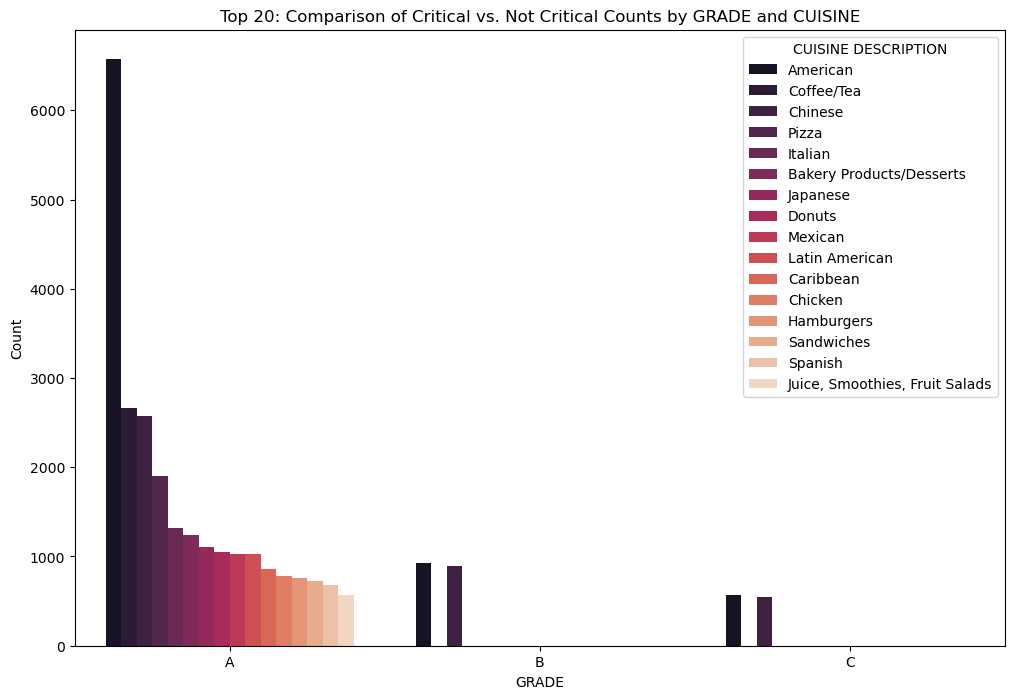

In [60]:
###Visualization for top 20 Restauarants with Criitcal Flags by Grade & Cuisine Description
grouped_data = df.groupby(['GRADE', 'CUISINE DESCRIPTION'])['CRITICAL FLAG'].value_counts().unstack(fill_value=0)

plot_data = grouped_data.reset_index()
# Select the top 20 combinations based on the total count
top_20_combinations = plot_data.sort_values('Critical', ascending=False).head(20)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_combinations, x='GRADE', y='Critical', hue= 'CUISINE DESCRIPTION', palette='rocket')
plt.title('Top 20: Comparison of Critical vs. Not Critical Counts by GRADE and CUISINE')
plt.xlabel('GRADE')
plt.ylabel('Count')
plt.legend(title= 'CUISINE DESCRIPTION', loc='upper right')
plt.show()


In [36]:
#Checking sum of the data
grouped_data = df.groupby(['GRADE', 'CUISINE DESCRIPTION','CRITICAL FLAG'])['CRITICAL FLAG'].count().unstack(fill_value=0)
grouped_data.head()
grouped_data['Critical'].sum()

46404

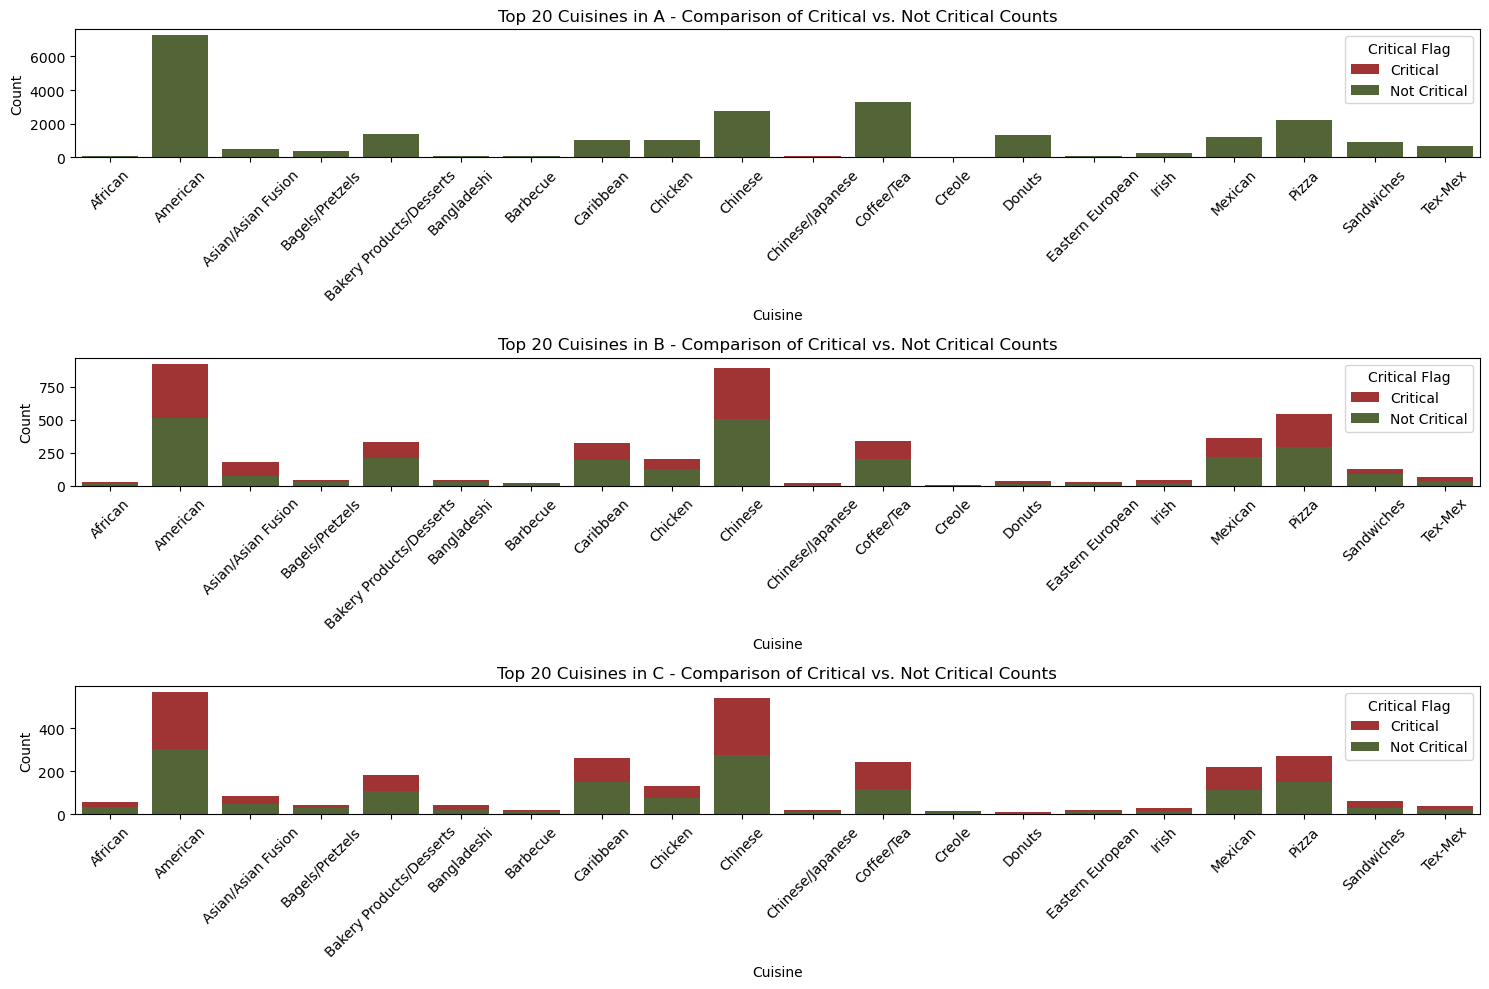

In [37]:
#Illustration the distribution of Critical vs. Not Critical violations across the top 20 cuisines by Grade

grouped_data = df.groupby(['GRADE', 'CUISINE DESCRIPTION','CRITICAL FLAG'])['CRITICAL FLAG'].count().unstack(fill_value=0)

plot_data = grouped_data.reset_index()

# Select the top 20 cuisines based on the count of 'Critical' values
top_20_cuisines = plot_data.groupby('CUISINE DESCRIPTION')['Critical'].count().nlargest(20).index

# Filter the DataFrame for the top 20 cuisines
top_20_data = plot_data[plot_data['CUISINE DESCRIPTION'].isin(top_20_cuisines)]

# Create a bar plot for each grade within the top 20 cuisines
grades = ['A', 'B', 'C']

plt.figure(figsize=(15, 10))

for grade in grades:
    grade_data = top_20_data[top_20_data['GRADE'] == grade]
    
    plt.subplot(3, 1, grades.index(grade) + 1)
    sns.barplot(data=grade_data, x='CUISINE DESCRIPTION', y='Critical', palette=['firebrick'], label='Critical')
    sns.barplot(data=grade_data, x='CUISINE DESCRIPTION', y='Not Critical', palette=['darkolivegreen'], label='Not Critical')
    plt.title(f'Top 20 Cuisines in {grade} - Comparison of Critical vs. Not Critical Counts')
    plt.xticks(rotation=45)
    plt.xlabel('Cuisine')
    plt.ylabel('Count')
    plt.legend(title='Critical Flag')

plt.tight_layout()
plt.show()



In [38]:
#statistical summary information for Critical & Not Critical across the top 20 cuisines.
Top_20 =top_20_data.describe()
Top_20 

CRITICAL FLAG,Critical,Not Critical
count,107.000000,107.000000
mean,281.373832,280.495327
std,764.510332,858.978346
min,0.000000,0.000000
25%,8.500000,7.000000
50%,41.000000,28.000000
75%,248.500000,138.000000
max,6575.000000,7251.000000


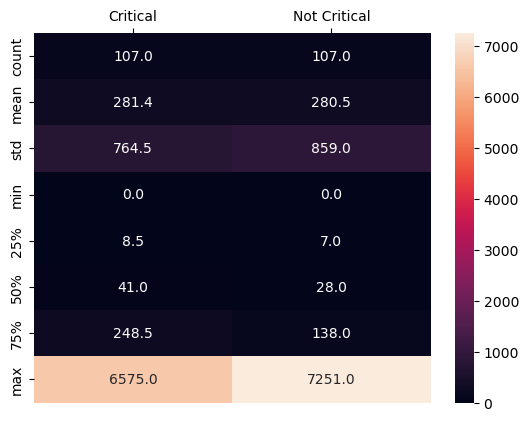

In [64]:
ax = sns.heatmap(Top_20,cmap="rocket", annot=True, fmt=".1f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [40]:
#Conclusion:
''''
-Both "Critical" and "Not Critical" categories consist of 107 data points each.
-Critical and "Not Critical" violations are comparable, with "Critical" having a slightly higher mean.
-The range of counts for both categories spans from 0 to a maximum of 6575 for "Critical" and 7251 for "Not Critical." 
-Food establishment can still be awarded an A grade even if it has Health Code violations.
-The assessment of inspection grades entails examining factors that could impact or distort the grading system, 
 particularly concerning inspector subjectivity and cultural bias. Variations in inspectors' individual standards and 
 interpretations of health codes may introduce subjectivity. There are also possibility of unintentionally show preference
 for specific culinary traditions over others.


SyntaxError: incomplete input (1889471717.py, line 2)